In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "santhiyar" # username from the json file
os.environ['KAGGLE_KEY'] = "c25344aefb0e49ab621b4df2c9fe27bf" # key from the json file

In [ ]:
!kaggle datasets download -d 'sartajbhuvaji/brain-tumor-classification-mri'

 84% 73.0M/86.8M [00:01<00:00, 44.8MB/s]
100% 86.8M/86.8M [00:01<00:00, 48.7MB/s]


In [ ]:
!unzip '/content/brain-tumor-classification-mri.zip'

Archive:  /content/brain-tumor-classification-mri.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.utils.vis_utils import plot_model

In [ ]:
from tensorflow import keras

In [ ]:
os.chdir('/content')

In [ ]:
tumor = [('glioma_tumor', 0),('meningioma_tumor', 1),('no_tumor', 2),('pituitary_tumor', 3)]
path1 = '/content/Training/'
path2 = '/content/Testing/'

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
X_train = []
y_train = []
for typ, val in tumor :
    for img in os.listdir(path1+typ) :
        image = load_img(path1+typ+'/'+img, color_mode = 'grayscale', target_size = (200,200), interpolation = 'nearest')
        X_train.append(img_to_array(image))
        y_train.append(val)

In [ ]:
X_test = []
y_test = []
for typ, val in tumor :
    for img in os.listdir(path2+typ) :
        image = load_img(path2+typ+'/'+img, color_mode = 'grayscale', target_size = (200,200), interpolation = 'nearest')
        X_test.append(img_to_array(image))
        y_test.append(val)

In [ ]:
X_train = np.array(X_train)
X_train/= 255.0

In [ ]:
y_train = np.array(keras.utils.to_categorical(y_train))

In [ ]:
X_test = np.array(X_test)
X_test/= 255.0

In [ ]:
y_test = np.array(keras.utils.to_categorical(y_test))

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2870, 200, 200, 1) (394, 200, 200, 1) (2870, 4) (394, 4)


In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 30
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,validation_data=(X_test,y_test))


Epoch 1/30
90/90 [==============================] - 9s 92ms/step - loss: 1.2662 - accuracy: 0.4447 - val_loss: 2.0044 - val_accuracy: 0.3223
Epoch 2/30
90/90 [==============================] - 8s 90ms/step - loss: 0.7372 - accuracy: 0.6904 - val_loss: 2.0196 - val_accuracy: 0.5533
Epoch 3/30
90/90 [==============================] - 8s 90ms/step - loss: 0.4901 - accuracy: 0.8023 - val_loss: 1.9604 - val_accuracy: 0.5939
Epoch 4/30
90/90 [==============================] - 8s 91ms/step - loss: 0.3487 - accuracy: 0.8611 - val_loss: 2.8649 - val_accuracy: 0.6827
Epoch 5/30
90/90 [==============================] - 8s 91ms/step - loss: 0.2747 - accuracy: 0.8925 - val_loss: 3.3497 - val_accuracy: 0.7157
Epoch 6/30
90/90 [==============================] - 8s 91ms/step - loss: 0.1947 - accuracy: 0.9324 - val_loss: 2.8848 - val_accuracy: 0.7640
Epoch 7/30
90/90 [==============================] - 8s 92ms/step - loss: 0.1197 - accuracy: 0.9557 - val_loss: 2.6232 - val_accuracy: 0.7538
Epoch 8/30
90

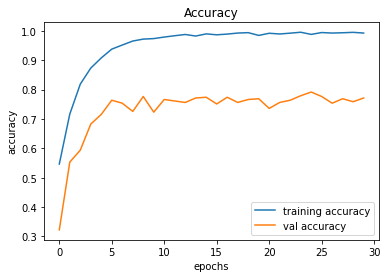

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


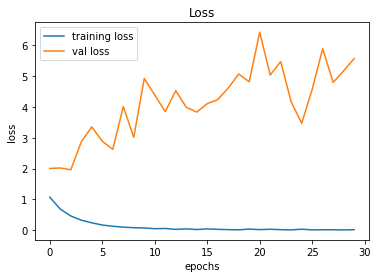

In [ ]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model.save("/content/model.h5")

In [ ]:
Y_pred=model.predict(X_test)
print(Y_pred)

[[1.8083843e-14 1.7323168e-06 6.8841246e-07 9.9999750e-01]
 [1.2634259e-06 3.4325176e-06 9.9999487e-01 5.3184789e-07]
 [2.7238179e-06 8.7503701e-01 1.2496028e-01 5.3330725e-12]
 ...
 [6.4578594e-13 1.9999759e-05 4.3378855e-05 9.9993658e-01]
 [1.9446705e-11 1.5203562e-03 4.4807760e-04 9.9803156e-01]
 [5.4849475e-15 2.5145948e-04 8.2972829e-09 9.9974853e-01]]


In [ ]:
X_test.shape

(394, 200, 200, 1)

In [ ]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 0s 27ms/step - loss: 5.5598 - accuracy: 0.7716


[5.55979585647583, 0.7715736031532288]

In [ ]:
classes={0:'glioma_tumor',1:'meningioma_tumor',2:'no_tumor',3:'pituitary_tumor'}

In [ ]:
import numpy as np

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    ima = Image.open(img)
    imag = ima.resize((30,30))
    data.append(np.array(imag))
    Xx_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return imag,Y_pred
    

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


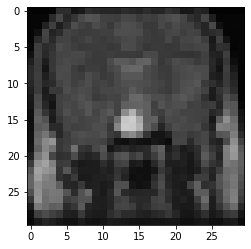

pituitary_tumor


In [ ]:
def _make_predict_function():
 
 plot,prediction = test_on_img('/content/Testing/pituitary_tumor/image(15).jpg')
 plt.imshow(plot)
 plt.show()
 y=max(prediction)
 print(classes[y])
_make_predict_function()